# [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## 0. 加载相关模块

https://www.jianshu.com/p/4b925654f506   seaborn和matplotlib的一些用法

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #可视化模块
from sklearn.model_selection import train_test_split

# 用于在jupyter中进行绘图
%matplotlib inline

## 1. 数据加载

### 1.1 数据预览

In [3]:
# 加载数据集
fruits_df = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

# 数据预览
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
print('样本个数：', len(fruits_df))

样本个数： 59


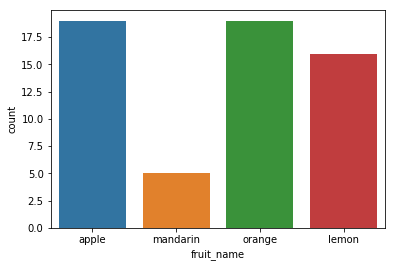

In [5]:
sns.countplot(fruits_df['fruit_name'], label="fruitNum")

### 1.2 数据处理 

In [3]:
# 创建目标标签和名称的字典
fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [7]:
# 划分数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']] #(N,4)
y = fruits_df['fruit_label'] #(N,1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [9]:
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


### 2. 可视化查看特征变量相关性


描述相关性一般使用 pairplot 图和 heatmap 图。pairmap图描述不同label在同一个特征上的分布。

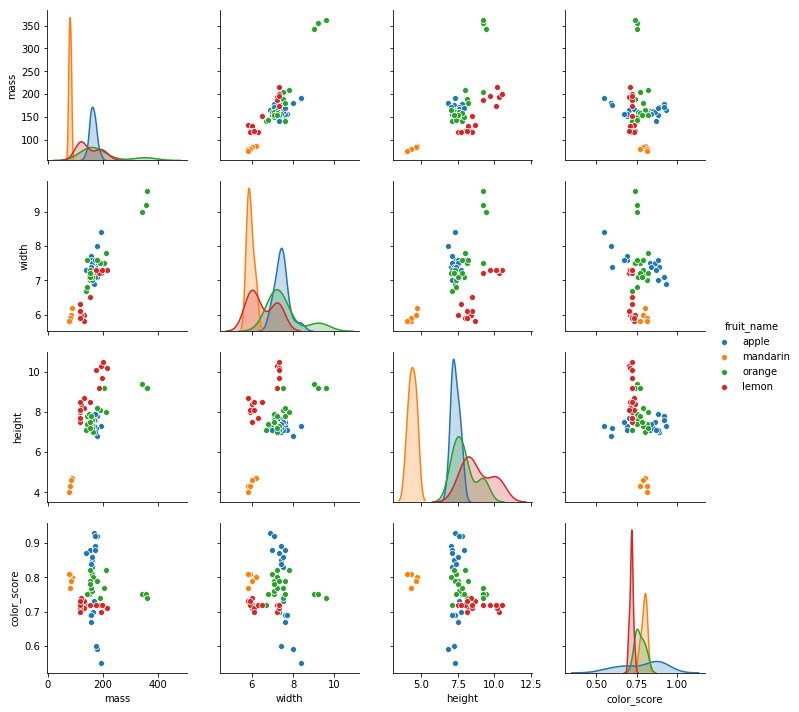

In [10]:
# 查看数据集 
sns.pairplot(data=fruits_df, hue='fruit_name', vars=['mass', 'width', 'height', 'color_score'])

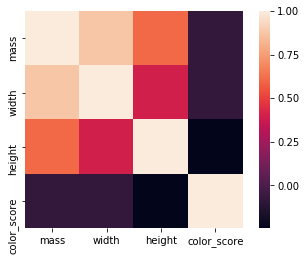

In [11]:
#查看不同特征之间的相关性
sns.heatmap(X.corr(),square=True)

<IPython.core.display.Javascript object>


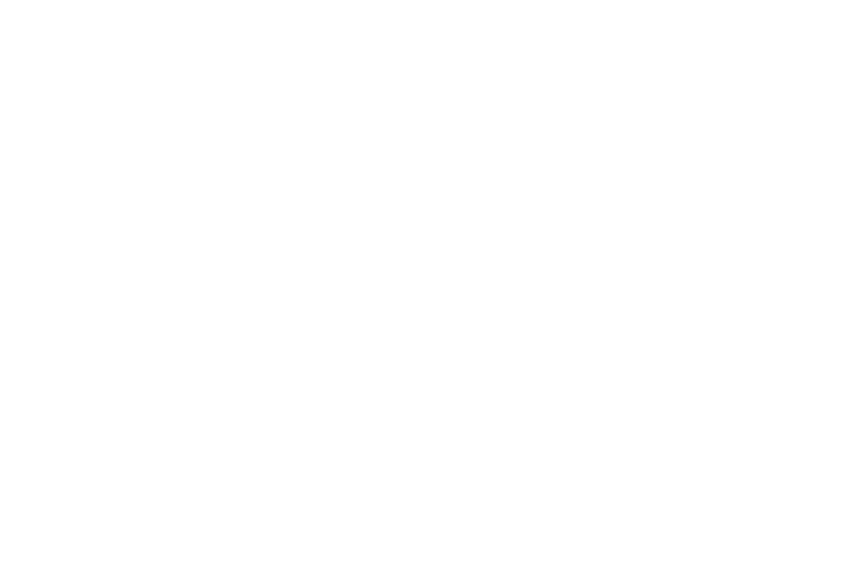

<IPython.core.display.Javascript object>


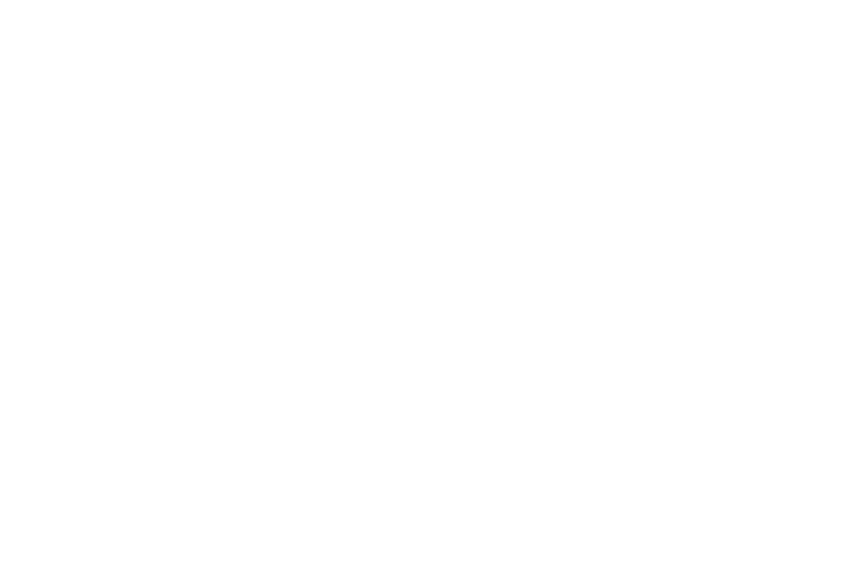

In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}  #如何批量设置不同label的点的颜色？用字典映射。
colors = list(map(lambda label: label_color_dict[label], y_train)) #对应的颜色变成一个list
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### 3. 建立/选择模型

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 建立kNN模型
knn = KNeighborsClassifier(n_neighbors=5)

### 4. 训练模型

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 5. 测试模型

In [21]:
y_pred = knn.predict(X_test)
print('预测标签：', y_pred)

预测标签： [3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]


In [33]:
print('真实标签：', y_test.values)

真实标签： [3 3 4 3 1 1 3 4 3 1 2 1 3 3 3]


In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('准确率：', acc)

准确率： 0.5333333333333333


### 6. 查看k值对结果的影响

<IPython.core.display.Javascript object>


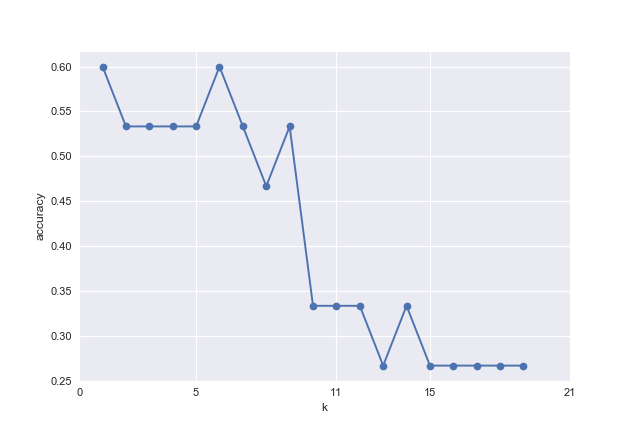

([<matplotlib.axis.XTick at 0x17b9eb40748>,
 <a list of 5 Text xticklabel objects>)

In [35]:
k_range = range(1, 20)
acc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_scores.append(knn.score(X_test, y_test)) #knn.score = knn.predict + accuracy_score
    
plt.figure()                                                     
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, acc_scores, marker='o')
plt.xticks([0, 5, 11, 15, 21])

K$\to\infty$,就会把新样本识别为样本数最多的那类（因为第一次投票就是所有的点）。从边界图中看，K越大，边界越光滑。以上这个分类器屁都没做，因为K=1结果最好

/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:114: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


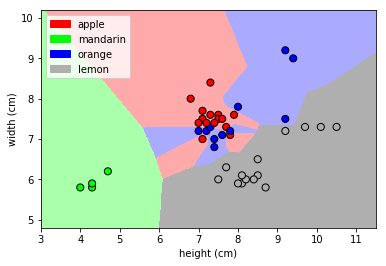

/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:114: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


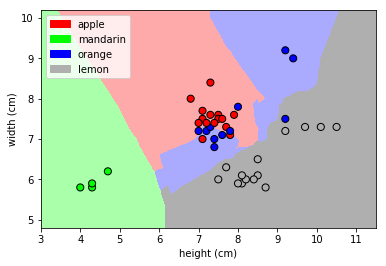

/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/apple/Downloads/小象__数据分析/kNN_codes/ml_visualization.py:114: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


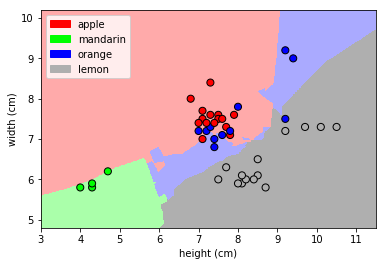

In [13]:
# 只查看width和height两列特征
from ml_visualization import plot_fruit_knn #自己写的可视化图边界算法
%matplotlib  inli 
plot_fruit_knn(X_train, y_train, 1) #K
plot_fruit_knn(X_train, y_train, 5)
plot_fruit_knn(X_train, y_train, 10)

### 7. KNN in regression

KNeighborsRegressor: 找与测试样本点最近的K样本，用这些样本的label(连续值)计算测试样本的label。
<br>
比如样本点是(x1,x2,x3,x4,x5),则x5是label，x1--x4是计算距离的坐标。